# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [16]:
#Starter Code

from bs4 import BeautifulSoup
import requests
url = 'https://www.azlyrics.com/c/chesney.html' #Put the URL of your AZLyrics Artist Page here!
def get_song_links(url):
    html_page = requests.get(url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing
    albums = soup.find_all("div", class_="album")
    #The example from our lecture/reading
    data = [] #Create a storage container
    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
        if album_n == len(albums)-1:
            cur_album = albums[album_n]
            album_songs = cur_album.findNextSiblings('a')
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
        else:
            cur_album = albums[album_n]
            next_album = albums[album_n+1]
            saca = cur_album.findNextSiblings('a') #songs after current album
            sbna = next_album.findPreviousSiblings('a') #songs before next album
            album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
    return data
data

[('Whatever It Takes',
  '../lyrics/kennychesney/whateverittakes.html',
  'album: "In My Wildest Dreams" (1995)'),
 ("Somebody's Callin'",
  '../lyrics/kennychesney/somebodyscallin.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('The Tin Man',
  '../lyrics/kennychesney/thetinman.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('High And Dry',
  '../lyrics/kennychesney/highanddry.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('I Finally Found Somebody',
  '../lyrics/kennychesney/ifinallyfoundsomebody.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('When She Calls Me Baby',
  '../lyrics/kennychesney/whenshecallsmebaby.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('In My Wildest Dreams',
  '../lyrics/kennychesney/inmywildestdreams.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('I Want My Rib Back',
  '../lyrics/kennychesney/iwantmyribback.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('Angel Loved The Devil',
  '../lyrics/kennychesney/angellovedthedevil.htm

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [7]:
#Remember to open up the webpage in a browser and control-click/right-click and go to inspect!
from bs4 import BeautifulSoup
import requests
url = 'https://www.azlyrics.com/lyrics/kennychesney/noshoesnoshirtnoproblems.html'


html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')
soup.prettify()

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="Lyrics to &quot;No Shoes, No Shirt, No Problems&quot; song by Kenny Chesney: I\'ve been up to my neck workin\' 6 days a week wearin\' holes in the soles of the shoes on my feet bee..." name="description"/>\n  <meta content="No Shoes, No Shirt, No Problems lyrics, Kenny Chesney No Shoes, No Shirt, No Problems lyrics, Kenny Chesney lyrics" name="keywords"/>\n  <meta content="noarchive" name="robots"/>\n  <meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>\n  <title>\n   Kenny Chesney - No Shoes, No Shirt, No Problems Lyrics | AZLyrics.com\n  </title>\n  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>\n  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>\n  <!-- HTML5 shim and Respond.js for

In [10]:
divs=soup.findAll('div')
div=divs[0]
for n, div in enumerate(divs):
    if "<!-- Usage of azlyrics.com content by any " in div.text:
        print(n)

In [11]:
main_page = soup.find('div', {"class": "container main-page"})
main_l2 = main_page.find('div', {"class" : "row"})
main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})

In [13]:
main_l3

<div class="col-xs-12 col-lg-8 text-center">
<div class="div-share noprint">
<div class="fb-like" data-action="like" data-href="https://www.azlyrics.com/lyrics/kennychesney/noshoesnoshirtnoproblems.html" data-layout="button_count" data-share="false" data-show-faces="false" style="float:left;"></div>
<!-- AddThis Button BEGIN -->
<script src="https://s7.addthis.com/js/300/addthis_widget.js#username=azlyrics" type="text/javascript"></script>
<div class="addthis_toolbox addthis_default_style" style="float:right;">
<a class="btn btn-xs btn-share addthis_button_email">
<span class="playblk"><img alt="Email" class="playblk" height="18" src="//www.azlyrics.com/images/email.svg" width="56"/></span>
</a>
<a class="btn btn-xs btn-share addthis_button_print" style="margin-right: 0px !important;">
<span class="playblk"><img alt="Print" class="playblk" height="18" src="//www.azlyrics.com/images/print.svg" width="56"/></span>
</a>
</div>
</div>
<!-- AddThis Button END -->
<div class="div-share"><h1>

In [12]:
lyrics = main_l3.findAll('div')[6].text
lyrics

"\n\r\nI've been up to my neck workin' 6 days a week\nwearin' holes in the soles of the shoes on my feet\nbeen dreamin' of gettin' away since I don't know\nAin't no better time than now..for mexico\n\nNo shoes, No shirt, No problems\nBlues what blues..hey I forgot them\nThe sun and the sand and a drink in my hand with no bottom \nand no shoes, no shirt, and no problems!\nNo problems \n\nWant a towel on a chair in the sand by the sea\nwant to look thru my shades and see you there with me\nWant to soak up life for a while\nIn laid back mode\nNo boss, no clock, no stress, no dress code \n\nNo shoes, no shirt, no problems \nBlues what blues hey I forgot them\nThe sun and the sand and a drink in my hand with no bottom\nand no shoes, no shirt, and no problems\n\nBabe lets get packed..tank tops and flip flops if you got them\nNo shoes, no shirt, no problems\nNo problems.\n"

In [14]:
def get_lyrics(song_url):
    html_page = requests.get(song_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    main_page = soup.find('div', {"class": "container main-page"})
    main_l2 = main_page.find('div', {"class" : "row"})
    main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})
    lyrics = main_l3.findAll('div')[6].text
    return lyrics

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [23]:
#Use this block for your code!
songs=get_song_links('https://www.azlyrics.com/c/chesney.html')
url_base = "https://www.azlyrics.com"
lyrics = []
for song in songs:
    try:
        url_sffx = song[1].replace('..','')
        url = url_base + url_sffx
        lyr = get_lyrics(url)
        lyrics.append(lyr)
    except:
        lyrics.append("N/A")

In [24]:
print(len(songs),len(lyrics))

242 242


In [22]:
songs

[('Whatever It Takes',
  '../lyrics/kennychesney/whateverittakes.html',
  'album: "In My Wildest Dreams" (1995)'),
 ("Somebody's Callin'",
  '../lyrics/kennychesney/somebodyscallin.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('The Tin Man',
  '../lyrics/kennychesney/thetinman.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('High And Dry',
  '../lyrics/kennychesney/highanddry.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('I Finally Found Somebody',
  '../lyrics/kennychesney/ifinallyfoundsomebody.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('When She Calls Me Baby',
  '../lyrics/kennychesney/whenshecallsmebaby.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('In My Wildest Dreams',
  '../lyrics/kennychesney/inmywildestdreams.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('I Want My Rib Back',
  '../lyrics/kennychesney/iwantmyribback.html',
  'album: "In My Wildest Dreams" (1995)'),
 ('Angel Loved The Devil',
  '../lyrics/kennychesney/angellovedthedevil.htm

In [25]:
import pandas as pd
df=pd.DataFrame(list(zip(songs,lyrics)))
df.head()

,0,1
0,"(Whatever It Takes, ../lyrics/kennychesney/wha...","\n\r\nWell, I've been drawing little hearts in..."
1,"(Somebody's Callin', ../lyrics/kennychesney/so...",\n\r\nSomebody's callin callin' my little darl...
2,"(The Tin Man, ../lyrics/kennychesney/thetinman...",\n\r\nSaw a man in the movies that didn't have...
3,"(High And Dry, ../lyrics/kennychesney/highandd...",\n\r\nlast night I think I put that homefire o...
4,"(I Finally Found Somebody, ../lyrics/kennyches...","\n\r\nWell I finally found somebody,\r\nWho li..."


In [28]:
df['Song_Name'] = df[0].map(lambda x: x[0])
df['Song_URL_SFFX'] = df[0].map(lambda x: x[1])
df['Album_Name'] = df[0].map(lambda x: x[2])
df = df.rename(columns={1:'Lyrics'})
df.head()

,0,Lyrics,Song_Name,Song_URL_SFFX,Album_Name
0,"(Whatever It Takes, ../lyrics/kennychesney/wha...","\n\r\nWell, I've been drawing little hearts in...",Whatever It Takes,../lyrics/kennychesney/whateverittakes.html,"album: ""In My Wildest Dreams"" (1995)"
1,"(Somebody's Callin', ../lyrics/kennychesney/so...",\n\r\nSomebody's callin callin' my little darl...,Somebody's Callin',../lyrics/kennychesney/somebodyscallin.html,"album: ""In My Wildest Dreams"" (1995)"
2,"(The Tin Man, ../lyrics/kennychesney/thetinman...",\n\r\nSaw a man in the movies that didn't have...,The Tin Man,../lyrics/kennychesney/thetinman.html,"album: ""In My Wildest Dreams"" (1995)"
3,"(High And Dry, ../lyrics/kennychesney/highandd...",\n\r\nlast night I think I put that homefire o...,High And Dry,../lyrics/kennychesney/highanddry.html,"album: ""In My Wildest Dreams"" (1995)"
4,"(I Finally Found Somebody, ../lyrics/kennyches...","\n\r\nWell I finally found somebody,\r\nWho li...",I Finally Found Somebody,../lyrics/kennychesney/ifinallyfoundsomebody.html,"album: ""In My Wildest Dreams"" (1995)"


## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [33]:
#Use this block for your code!
import matplotlib.pyplot as plt
import seaborn as sns
pd.Series(df.Lyrics.iloc[2].split()).value_counts()[:10]

I           17
a           10
wouldn't     7
And          6
man          6
tin          5
have         5
me           5
I'd          5
to           4
dtype: int64

Text(0.5, 1.0, "Top 10 Lyrics for Somebody's Callin'")

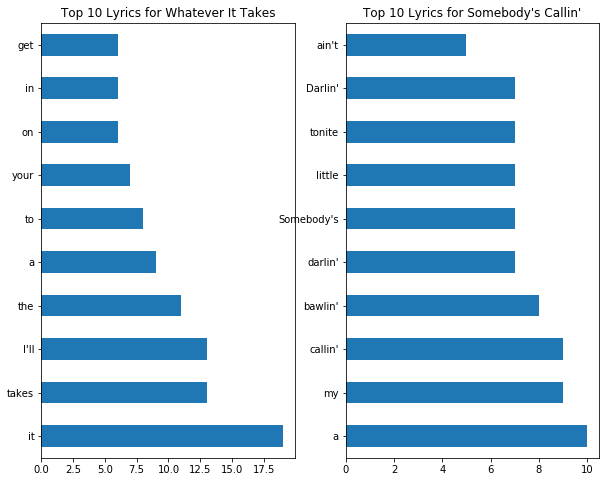

In [31]:
fig, axes = plt.subplots(1,2, figsize=(10,8))
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[0], kind='barh')
#Add Subplot Title
axes[0].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[0]))
#Repeat
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[1].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[1], kind='barh')
#Add Subplot Title
axes[1].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[1]))

## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

In [ ]:
#Use this block for your code!

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!